In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier

In [2]:
heart = pd.read_csv('clevelanda.csv')


In [3]:
heart.shape

(303, 14)

In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   gender    303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fps       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  class     303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 30.8+ KB


In [5]:
heart.head()

,age,gender,cp,trestbps,chol,fps,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [6]:
heart['ca'].value_counts()

0    176
1     65
2     38
3     20
?      4
Name: ca, dtype: int64

In [7]:
heart['thal'].value_counts()

3    166
7    117
6     18
?      2
Name: thal, dtype: int64

In [8]:
heart['class'].value_counts()

0    164
1     55
2     36
3     35
4     13
Name: class, dtype: int64

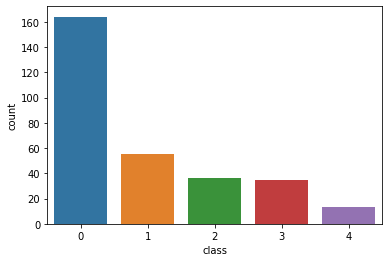

In [9]:
import seaborn as sns
sns.countplot(heart['class'])

In [10]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [11]:
df = heart.iloc[:,[0,3]]
df.head()


,age,trestbps
0,63,145
1,67,160
2,67,120
3,37,130
4,41,130


In [12]:
heart.dropna(axis=0)

,age,gender,cp,trestbps,chol,fps,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


In [13]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   gender    303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fps       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  class     303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 30.8+ KB


In [14]:
heart = heart.replace('?', np.nan)

In [15]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   gender    303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fps       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    object 
 12  thal      301 non-null    object 
 13  class     303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 30.8+ KB


In [16]:
heart.isnull().sum()

age         0
gender      0
cp          0
trestbps    0
chol        0
fps         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
class       0
dtype: int64

In [17]:
heart = heart.dropna()

In [19]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   gender    297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fps       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    object 
 12  thal      297 non-null    object 
 13  class     297 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 32.5+ KB


In [20]:
heart['ca'].value_counts()

0    174
1     65
2     38
3     20
Name: ca, dtype: int64

In [21]:
heart['ca'] = pd.to_numeric(heart['ca'])

In [22]:
heart.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   gender    297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fps       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    int64  
 12  thal      297 non-null    object 
 13  class     297 non-null    int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 33.6+ KB


In [23]:
heart['thal'] = pd.to_numeric(heart['thal'])

In [25]:
heart.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   gender    297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fps       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    int64  
 12  thal      297 non-null    int64  
 13  class     297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 34.8 KB


In [28]:
X = heart.iloc[:,:13]
X.head()

,age,gender,cp,trestbps,chol,fps,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3


In [30]:
y = heart.iloc[:,13:]
y.head()

,class
0,0
1,2
2,1
3,0
4,0


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.2)

In [32]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(237, 13)
(237, 1)
(60, 13)
(60, 1)


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import neighbors
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

In [34]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [35]:
predicted = model.predict(X_train)
predicted

array([2, 3, 0, 4, 3, 3, 0, 2, 0, 0, 0, 3, 0, 0, 1, 0, 3, 0, 0, 0, 2, 3,
       0, 1, 0, 0, 3, 0, 1, 0, 0, 0, 0, 4, 3, 0, 2, 0, 0, 2, 1, 0, 0, 2,
       1, 0, 0, 3, 1, 1, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 1, 1, 0, 0, 0,
       2, 0, 2, 0, 4, 2, 0, 3, 0, 1, 0, 2, 0, 0, 0, 0, 1, 3, 3, 2, 1, 0,
       0, 2, 3, 1, 0, 0, 2, 1, 0, 1, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 3, 0, 0, 1, 0, 1, 1, 0, 0, 1, 2, 1, 1, 0, 0, 2, 0, 0, 0, 1, 1,
       4, 0, 0, 3, 0, 2, 4, 3, 0, 0, 0, 0, 2, 3, 0, 1, 0, 4, 0, 0, 1, 0,
       3, 0, 3, 2, 3, 2, 0, 1, 3, 0, 2, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0,
       1, 0, 3, 1, 0, 0, 2, 0, 1, 0, 0, 0, 4, 4, 2, 1, 0, 0, 0, 0, 3, 0,
       0, 0, 1, 3, 3, 1, 1, 0, 4, 1, 0, 0, 0, 1, 0, 1, 0, 2, 1, 0, 3, 4,
       3, 0, 0, 2, 0, 0, 0, 0, 0, 3, 1, 1, 0, 0, 0, 2, 0], dtype=int64)

In [36]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train,predicted)

1.0

In [37]:
print(metrics.confusion_matrix(y_train, predicted))

[[128   0   0   0   0]
 [  0  41   0   0   0]
 [  0   0  25   0   0]
 [  0   0   0  33   0]
 [  0   0   0   0  10]]


In [38]:
print(metrics.classification_report(y_train, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       128
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        25
           3       1.00      1.00      1.00        33
           4       1.00      1.00      1.00        10

    accuracy                           1.00       237
   macro avg       1.00      1.00      1.00       237
weighted avg       1.00      1.00      1.00       237



In [39]:
from sklearn.model_selection import cross_val_score 
accuracies = cross_val_score(estimator = model, X = X,\
     y = y, cv = 10)
print("Accuracy Mean {} Accuracy Variance \
     {}".format(accuracies.mean(),accuracies.std()))

Accuracy Mean 0.49884024577572966 Accuracy Variance      0.09012333629192988


In [40]:
import pickle

pickle.dump(model, open("model.pkl", "wb" ))

my_scaler = pickle.load(open("model.pkl", "rb" ))

predictions = my_scaler.predict(X_test)

In [41]:
predictions

array([1, 0, 3, 0, 2, 2, 0, 2, 3, 0, 3, 0, 0, 3, 0, 0, 0, 0, 3, 0, 3, 1,
       0, 2, 1, 2, 0, 0, 1, 1, 3, 0, 2, 0, 0, 0, 2, 0, 0, 3, 1, 0, 0, 1,
       0, 0, 1, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)